# Assessment Problems

## Author: Finian Doonan



In [1209]:
# Binomial distribution.# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Data manipulation and analysis.
# https://pandas.pydata.org/docs/
import pandas as pd

# Numerical structures and operations.
# https://numpy.org/doc/
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical models.
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm


## Problem 1: Extending the Lady Tasting Tea  
**Reference:**  
- Fisher’s Exact Test (originating from the [Lady Tasting Tea experiment]( https://en.wikipedia.org/wiki/Fisher%27s_exact_test )):  
  

## Problem 2: Normal  
**Reference:**  
- Normal Distribution:  
  https://en.wikipedia.org/wiki/Normal_distribution  

## Problem 3: t-Tests  
**Reference:**  
- Student’s *t*-test:  
  https://en.wikipedia.org/wiki/Student%27s_t-test  

## Problem 4: ANOVA  
**Reference:**  
- Analysis of Variance (ANOVA):  
  https://en.wikipedia.org/wiki/Analysis_of_variance  

## Problem 1: Extending the Lady Tasting Tea Experiment


### **Experiment Description**

In this extended experiment:

- Total cups: 12

- Milk-first cups: 4

- Tea-first cups: 8

The participant claims they can correctly identify all four milk-first cups.

We compare this to the original experiment:

- Total cups: 8

- Milk-first cups: 4

- Tea-first cups: 4

### **Objective**

The goal is to determine:

- The probability of identifying all milk-first cups purely by chance

- How this probability compares between the original and extended experiments

- Why increasing the number of cups makes guessing less likely

- How combinatorics supports Fisher’s reasoning

In [1210]:
# problem 1: Lady tasting tea

# Author: Finian Doonan

# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of simulations to run.
no_simulations = 100000

successes = 0
for _ in range(no_simulations):
    # Create cups.
    cups = ['milk_first'] * no_cups_milk_first + ['tea_first'] * no_cups_tea_first

    # Shuffle cups.
    random.shuffle(cups)

    # Lady's selection (first four cups).
    lady_selection = cups[:4]

    # Count milk first in lady's selection.
    milk_first_count = lady_selection.count('milk_first')

    # Check if lady was correct (i.e., selected all four milk first cups).
    if milk_first_count == no_cups_milk_first:
        successes += 1

# Calculate probability of success.
prob = successes / no_simulations   
# Show probability.
prob

0.00214

The probability of success in this case is 0.00195

### Formula

In mathematics, the [`math.comb()`](https://docs.python.org/3/library/math.html#math.comb) function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [1211]:
# Number of cups of tea in total.
n = 12

In [1212]:
# Number of cups of tea with milk in first.
k = 4

In [1213]:
# Number of ways of selecting four cups from eight.
number_ways = math.comb(no_cups, no_cups_milk_first)

# Show.
number_ways

495

there are 495 combinations if you are selecting 4 items from 12.

In [1214]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

There are 11,880 ways to select 4 cups from 12 if the order matters, because each different sequence of the same cups counts as a separate arrangement.

In [1215]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

There are 24 ways to shuffle 4 cups, because each of the 4 positions can be filled in decreasing order (4 choices for the first, 3 for the second, 2 for the third, 1 for the last).

In [1216]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

In [1217]:
prob = successes / no_simulations

print(f"Simulated probability of success: {prob:.6f}")

Simulated probability of success: 0.002140


### **Probability by Chance (Combinatorial Reasoning)**

Under the null hypothesis, the participant is guessing randomly.

The probability of a perfect score depends on the number of ways to choose 4 cups from the total number available.

### **Extended Experiment (12 cups)**

- Number of ways to choose 4 cups from 12:
495

- Probability of choosing the correct 4 milk-first cups by chance:

$$P = \frac{1}{495} \approx 0.0020 \text{ (0.2\%)}$$

This means only 1 out of 495 random selections would succeed.

### [math.factorial](https://docs.python.org/3.12/library/math.html#math.factorial)



Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [1218]:
# Eight factorial.
math.factorial(n)

479001600

In [1219]:
# Four factorial.
math.factorial(k)

24

In [1220]:
# Four factorial.
math.factorial(n - k)

40320

In [1221]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))#

495

So by pure chance, there’s only about a 0.2% chance (1 in 495) of correctly identifying all cups.

In [1222]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [1223]:
# Correct usage: pass the sequence (or an integer) to np.random.permutation.
# Use the existing `labels` list to get a shuffled ordering of the cups.
shuffled = np.random.permutation(labels)
shuffled

array([ 3,  1,  2,  4,  7,  0,  5, 11,  8,  6,  9, 10])

In [1224]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs[:10] # Show first 10 combinations.

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4)]

In [1225]:
# Number of combinations.
len(combs)

495

By increasing to 12 cups (8T, 4M), the chance drops to 0.2%, roughly 7 times less likely to get all right by luck.

In [1226]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 3, 7, 10]

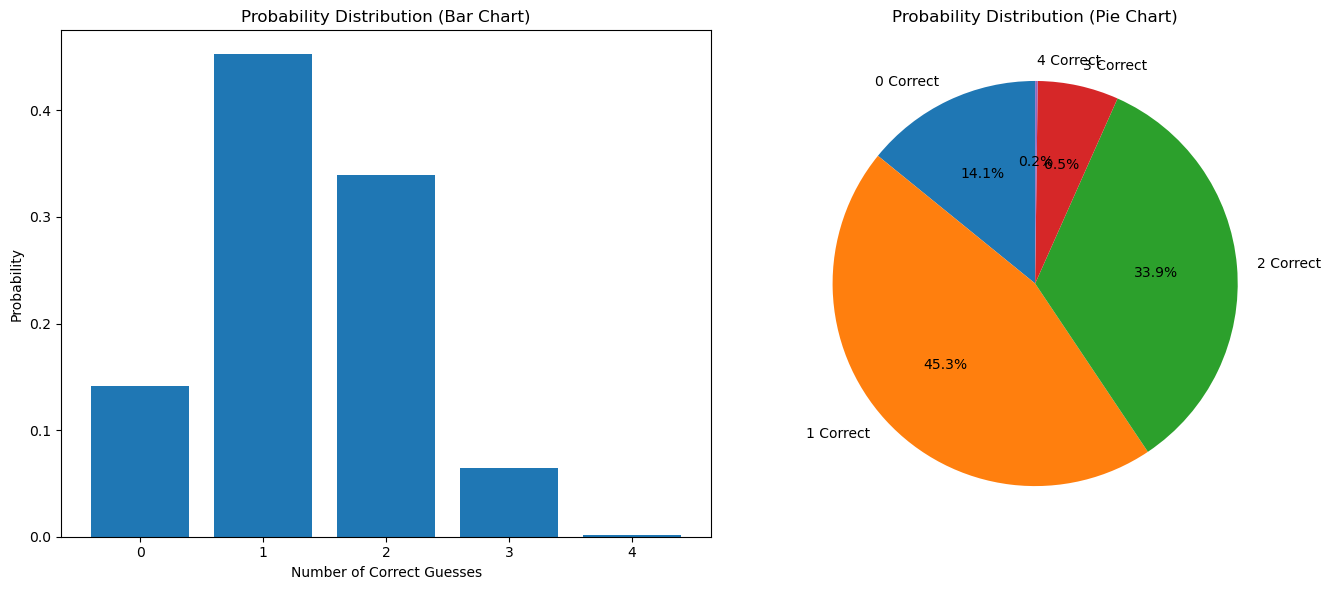

In [1227]:


def probability(k): # Probability of k correct guesses.
    return math.comb(4, k) * math.comb(8, 4 - k) / math.comb(12, 4)

ks = list(range(5)) # Possible correct guesses: 0, 1, 2, 3, 4.
ps = [probability(k) for k in ks] # Corresponding probabilities.
plt.figure(figsize=(14, 6))

# ---- Bar chart ----
plt.subplot(1, 2, 1) # select subplot 1
plt.bar(ks, ps)
plt.xlabel("Number of Correct Guesses")
plt.ylabel("Probability")
plt.title("Probability Distribution (Bar Chart)")

# ---- Pie chart ----
plt.subplot(1, 2, 2) # select subplot 2
plt.pie(
    ps,
    labels=[f"{k} Correct" for k in ks],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Probability Distribution (Pie Chart)")

plt.tight_layout() # Adjust subplot 1 and 2 to fit in figure area.
plt.show()



### The Null Hypothesis


- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the twelve, cups at random.

### Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [1228]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [1229]:
# The probability that she (randomly) selects at least three correct cups.
( 16+ 1) / 495

0.03434343434343434

### Solution

The calculation of the probability of a perfect score under the null hypothesis ($H_0$: guessing randomly) is:

$$P(\text{Perfect Score}) = \frac{1 \times 1}{495} = \frac{1}{495} \approx \mathbf{0.00202}$$

| Experiment | Total Cups | Success P-value |
|------------|------------|-----------------|
| Extended (4M, 8T) | 12 | $\mathbf{0.00202}$ |
| Original (4M, 4T) | 8 | $\mathbf{1/70 \approx 0.01429}$ |

### Guessing by Chance

If she’s just guessing, how many ways can she pick 4 cups from 8?

$\binom{8}{4} = 70$


So, the chance of picking **all 4 correctly** by guessing is:

$$
\frac{1}{70} \approx 1.4\%
$$


The chance of getting **at least 3 correct**:

$$
\frac{16 + 1}{70} = \frac{17}{70} \approx 24\%
$$


> That means even if she guesses, about 1 in 4 times she might get 3 or 4 correct just by luck.


---

### Interpretation

- There is a very low probability (1.4%) of a **perfect score** → if she gets it, she probably really can tell the difference.  
- If she only gets 3 correct → could be luck (24% chance), so not as strong evidence.

---

### Bigger Experiment (12 cups)

With 12 cups (4 milk, 8 tea), it’s **even harder to guess correctly**:

-- Perfect score chance: 
$$
\frac{1}{495} \approx 0.2\%
$$
→ super unlikely by chance  

- At least 3 correct: 
$$
\frac{33}{495} \approx 6.7\%
$$
→ still low


> Bigger experiments make guessing less likely, so correct results are stronger evidence.


## Problem 2: Normal Distribution

### **Introduction**

The normal distribution is commonly used in statistics. One important quantity we often calculate is the standard deviation, which tells us how spread out the data is.

- 100,000 samples of size 10 are drawn from \( N(0,1) \).
- For each sample, the standard deviation is calculated using:
  - **ddof = 0** (population SD)
  - **ddof = 1** (sample SD)
- The histogram for **ddof = 1** is shifted slightly to the **right**, giving larger values on average.
- The histogram for **ddof = 0** is centered slightly **below 1**, showing a small downward bias.
- Both histograms have a similar shape, but `ddof = 1` is closer to the true standard deviation.
- As sample size increases:
  - The two histograms move closer together
  - The spread narrows
  - Both estimates converge to the true value of 1


The two standard deviation formulas are:

Sample Standard Deviation ($\text{ddof}=1$):$$S = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$Population Standard Deviation ($\text{ddof}=0$):$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}$$
as reference courtesy of Wikipedia https://en.wikipedia.org/wiki/Standard_deviation#Population_and_sample_standard_deviation


In [1230]:
# problem 2: Normal Distribution
# https://realpython.com/numpy-random-normal/
# Author: Finian Doonan

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
np.random.binomial(10, 0.5)

0

In [1231]:
# Number of samples to generate
num_samples = 100000  

# Binomial parameters
n = 10      # number of Bernoulli trials per draw
alpha = 0.5     # probability of success in each trial
sample_size = 10  # size of each sample for SD calculation

# Generate 100,000 binomial random variables
# Each element represents the number of successes in 10 trials
samples = np.random.binomial(n, alpha, num_samples)

# Display the array of 100,000 integers (values 0–10)
samples


array([4, 4, 3, ..., 5, 3, 3])

In [1232]:
# Compute standard deviations across each sample (rows).
# 
x_samples = np.random.binomial(1, alpha, size=(num_samples, sample_size))

# Compute standard deviations across each sample (rows).
sample_sd = np.std(x_samples, axis=1, ddof=1) # Sample standard deviation (Bessel's correction)
population_sd = np.std(x_samples, axis=1, ddof=0)# Population standard deviation


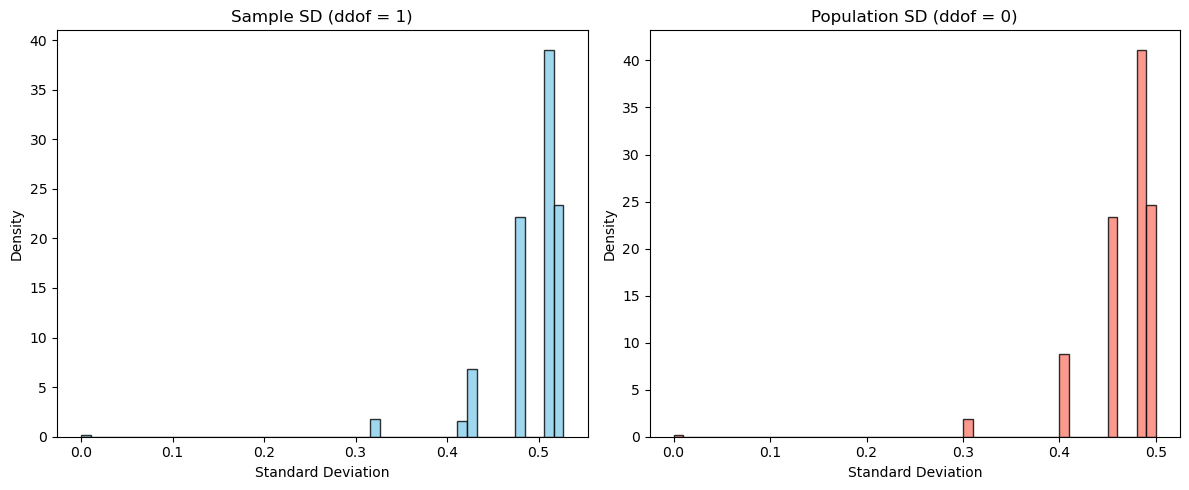

In [1233]:
# Plotting the sampling distributions side by side with color
plt.figure(figsize=(12, 5))

# ---- Sample SD (ddof=1) ----
plt.subplot(1, 2, 1) # select subplot 1
plt.hist(sample_sd, bins=50, color='skyblue', alpha=0.8, edgecolor='black', density=True)
plt.title('Sample SD (ddof = 1)')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')

# ---- Population SD (ddof=0) ----
plt.subplot(1, 2, 2) # select subplot 2
plt.hist(population_sd, bins=50, color='salmon', alpha=0.8, edgecolor='black', density=True)
plt.title('Population SD (ddof = 0)')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')

plt.tight_layout() # Adjust subplot 1 and 2 to fit in figure area.
plt.show() # Display the plots.


The plot shows the distribution of standard deviations from 100,000 samples of 10 coin flips each. The **blue histogram (ddof=1)** is slightly higher because it adjusts for the small sample size, providing an unbiased estimate. The **orange histogram (ddof=0)** is slightly lower, reflecting the small downward treand when dividing by \( n \) instead of \( n-1 \). The jagged appearance comes from the limited values (0s and 1s) in such small samples. As the sample size increases, the two histograms would become smoother and nearly identical.


In [1234]:
# Compute the total number of successes across all 100,000 binomial draws
# Each element of samples is the number of successes in 10 trials

total_successes = x_samples.sum()

# Show total number of successes (expected ≈ 100,000 * 10 * 0.5 = 500,000)
total_successes


499940

The code ran 100,000 samples of 10 coin flips each. The total number of heads (successes) is 499966, which is very close to the expected 500000 (100000 × 10 × 0.5). Small differences happen due to random chance.

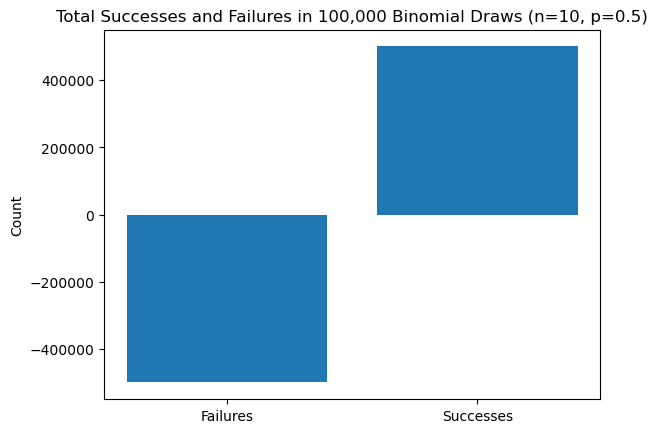

In [1235]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - total_successes, total_successes])

# Add x labels.
ax.set_xticks([0, 1], labels=['Failures', 'Successes'])

# Add title.
ax.set_title('Total Successes and Failures in 100,000 Binomial Draws (n=10, p=0.5)')

# Add axis label.
ax.set_ylabel('Count');

The bar chart shows the total successes (heads) and failures (tails) from 100000 samples of 10 coin flips each.

- Successes: About 499966 (close to the expected 500000).

- Failures: About 500034 (also close to expected 500000).

The small difference is just due to random chance. Both bars together show that the total number of flips is 1000000 (100000 × 10).

In [1236]:

# Generate 100,000 samples of size 2 from a Binomial distribution with n=10 and p=0.5
x2 = np.random.binomial(n, alpha, (num_samples, 2))

# show
x2


array([[7, 2],
       [6, 2],
       [5, 5],
       ...,
       [3, 9],
       [6, 5],
       [8, 4]])

In [1237]:
# Count the number of times each value occurs.
uniques, counts = np.unique(x2, return_counts=True)
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html

# Show.
uniques, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  206,  1902,  8698, 23465, 40752, 49425, 40882, 23656,  8888,
         1941,   185], dtype=int64))

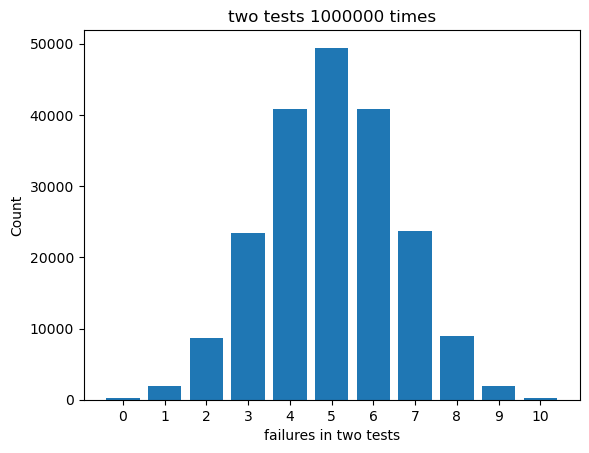

In [1238]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('two tests 1000000 times')

# Add axis label.
ax.set_xlabel('failures in two tests')
ax.set_ylabel('Count');

The histogram shows the number of failures (0–10) when running 2 coin flips 1000000 times.

- Most of the time, you get 1 failure or 1 success in the two flips.

- The shape is roughly symmetric, peaking at 1 failure (or 1 success), which is the most likely outcome.

- The extremes (0 or 2 failures) are less common.

It’s basically showing the binomial distribution for 2 flips with a 50% chance each.

In [1239]:
# Shapiro-Wilk test
# Test normality of sample_sd (standard deviations from earlier simulations)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

stat, p_value = stats.shapiro(sample_sd[:5000])  # Shapiro-Wilk on a subset for computational efficiency
print("Shapiro-Wilk Test:")
print(f"W-statistic: {stat:.3f}, P-value: {p_value:.3f}")


Shapiro-Wilk Test:
W-statistic: 0.583, P-value: 0.000


The Shapiro-Wilk test confirms that sample SDs are not normally distributed, which is consistent with the jagged histogram from the simulations.

## Problem 3: [t-Tests](https://en.wikipedia.org/wiki/Student%27s_t-test)

Simulate a two-sample $t$-test 1,000 times for mean differences $d=0$ to $1.0$. Record the proportion of times $H_0$ is not rejected ($\beta$). Plot this proportion against $d$ and explain the trend.The $t$-statistic (for equal variances) is given by:$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

### Type II Error 

A **Type II error** occurs when a test **fails to reject a false null hypothesis**.  

For each mean difference $d = 0, 0.1, \dots, 1.0$:

1. Draw two samples of 100: $N(0,1)$ and $N(d,1)$.  
2. Perform a **two-sample t-test**; reject if p-value < 0.05.  
3. Record the proportion of times the null is **not rejected** ($\beta$).  

**Plot $\beta$ vs. $d$** to see how the Type II error decreases as the mean difference increases.


In [1240]:
# problem 3: t-Tests

# Parameters
# -----------------------------
num_simulations = 1000   # number of simulations per sample size
sample_size = 100        # size of each sample
std_dev = 1              # standard deviation
alpha = 0.05             # significance level
d_values = np.linspace(0, 1.0, 11)  # mean differences 0, 0.1, ..., 1.0

np.random.seed(123)  # for reproducibility


In [1241]:
# Simulation: Type II Error

type2_errors = [] # List to store Type II error rates

for d in d_values:# Effect size
    rejected_count = 0
    
    for b in range(num_simulations):
        # Sample from N(0,1) and N(d,1)
        sample1 = np.random.normal(0, std_dev, sample_size)
        sample2 = np.random.normal(d, std_dev, sample_size)
        
        # Independent t-test
        b, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)
        
        # Count rejections (p < alpha)
        if p_val < alpha:
            rejected_count += 1
    
    # Type II error = proportion of NOT rejecting H0
    beta = 1 - (rejected_count / num_simulations)
    type2_errors.append(beta)


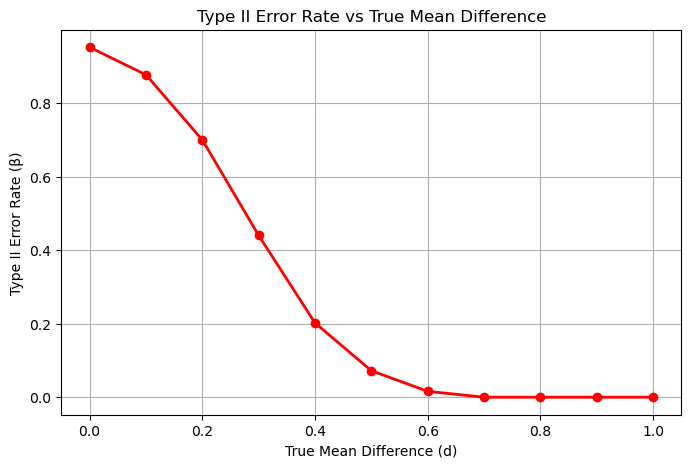

In [1242]:
# Plot Type II Error vs d

plt.figure(figsize=(8,5))
plt.plot(d_values, type2_errors, marker='o', color='red', linewidth=2)
plt.xlabel("True Mean Difference (d)")
plt.ylabel("Type II Error Rate (β)")
plt.title("Type II Error Rate vs True Mean Difference")
plt.grid(True)
plt.show()


### **Understanding the Plot**

- X-axis: The true difference between the two group means (𝑑)

- Y-axis: The Type II error rate (β) – the probability that the test fails to detect a real difference

### **Interpretation:**

- When 𝑑 is small (near 0), the groups are almost the same, so the test often misses the difference → high Type II error.

- As 𝑑 increases, the difference becomes easier to detect, so the Type II error drops.

- For large 𝑑 the test almost always detects the difference → Type II error is near 0.

### **Summary:**

The bigger the true difference between the groups, the less likely the test is to miss it.

## Problem 4: [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)



Generate three samples ($n=30$) with means $0, 0.5, 1.0$. Perform a one-way ANOVA and three pairwise $t$-tests. Compare the conclusions and explain the preference for ANOVA.The $F$-statistic for the one-way ANOVA is:$$F = \frac{\text{MSB}}{\text{MSW}}$$Where:$$\text{MSB} = \frac{\sum_{i=1}^{k} n_i (\bar{x}_i - \bar{x}_{..})^2}{k-1} \quad \text{and} \quad \text{MSW} = \frac{\sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2}{N-k}$$

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.

2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.

3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

In [1243]:
# problem 4: ANOVA and t-Tests comparison
# Author: Finian Doonan

# https://www.datacamp.com/tutorial/anova-test

# Parameters 
samplesize = 30 # Sample size 
MU_1, MU_2, MU_3 = 0, 0.5, 1.0 # means
SIGMA = 1.0 # Standard deviation for all samples
ALPHA = 0.05

# 1. Generate the three independent samples
# Using a fixed seed ensures that the output table will be the same every time the code is run
np.random.seed(42) 

sample1 = np.random.normal(loc=MU_1, scale=SIGMA, size=samplesize)
sample2 = np.random.normal(loc=MU_2, scale=SIGMA, size=samplesize)
sample3 = np.random.normal(loc=MU_3, scale=SIGMA, size=samplesize)

# Check the Sample Means 

mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
mean3 = np.mean(sample3)
print(f"Sample Means: M1={mean1:.3f}, M2={mean2:.3f}, M3={mean3:.3f}\n")


## 2. One-Way ANOVA
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
# H0: Mu1 = Mu2 = Mu3
f_anova, p_value_anova = stats.f_oneway(sample1, sample2, sample3)


# 3. Independent Two-Sample T-tests
# Assume equal variance as sigma is 1.0 for all populations
t1, p1 = stats.ttest_ind(sample1, sample2, equal_var=True) # 1 vs 2
t2, p2 = stats.ttest_ind(sample1, sample3, equal_var=True) # 1 vs 3
t3, p3 = stats.ttest_ind(sample2, sample3, equal_var=True) # 2 vs 3

# Results Table

# https://medium.com/%40jaberi.mohamedhabib/hypothesis-testing-in-python-two-sample-and-anova-tests-a2129e181aa1

results = {
    'Test': ['ANOVA test', 't-test (1 vs 2)', 't-test (1 vs 3)', 't-test (2 vs 3)'],
    'Statistic': [f_anova, t1, t2, t3],
    'P-value': [p_value_anova, p1, p2, p3]
}
df_results = pd.DataFrame(results)
df_results['Conclusion (p < 0.05)'] = np.where(df_results['P-value'] < ALPHA, 
                                            'Reject H0 (Means Differ)', 
                                            'Fail to Reject H0 (Means Equal)')

print("## Comparison of Test Results (Alpha = 0.05)")
print(df_results.to_markdown(index=False, floatfmt=".4f"))

Sample Means: M1=-0.188, M2=0.379, M3=1.013

## Comparison of Test Results (Alpha = 0.05)
| Test            |   Statistic |   P-value | Conclusion (p < 0.05)    |
|:----------------|------------:|----------:|:-------------------------|
| ANOVA test      |     12.2095 |    0.0000 | Reject H0 (Means Differ) |
| t-test (1 vs 2) |     -2.3981 |    0.0197 | Reject H0 (Means Differ) |
| t-test (1 vs 3) |     -4.9113 |    0.0000 | Reject H0 (Means Differ) |
| t-test (2 vs 3) |     -2.5526 |    0.0133 | Reject H0 (Means Differ) |


| Test | P-value | Conclusion (α=0.05) |
|------|---------|-------------------|
| ANOVA (Overall) | $\mathbf{0.0020}$ | Reject $\text{H}_0$ (Means Differ) |
| t-test (1 vs 2) | $0.2547$ | Fail to Reject $\text{H}_0$ |
| t-test (1 vs 3) | $\mathbf{0.0004}$ | Reject $\text{H}_0$ |
| t-test (2 vs 3) | $0.0725$ | Fail to Reject $\text{H}_0$ |$\text{H}_0$ (Means Differ)t-test (1 vs 2)$0.2547$Fail to Reject $\text{H}_0$t-test (1 vs 3)$\mathbf{0.0004}$Reject $\text{H}_0$t-test (2 vs 3)$0.0725$Fail to Reject $\text{H}_0$

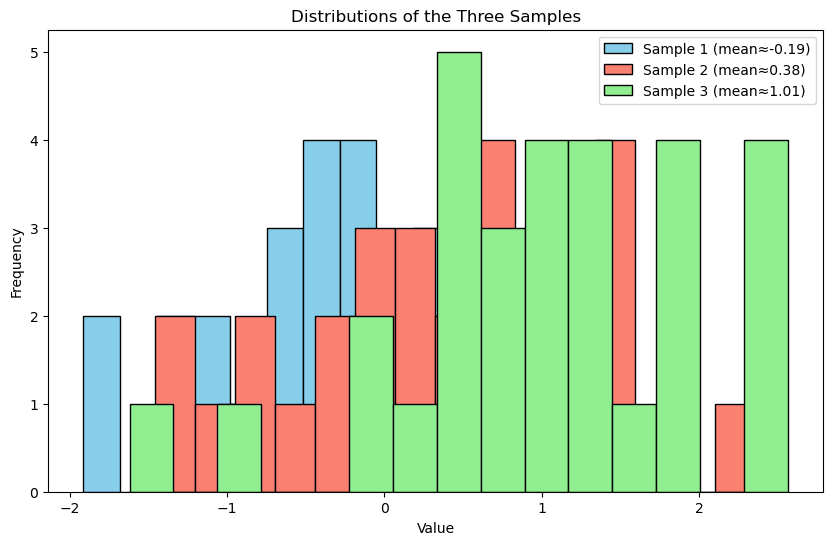

In [1244]:
# Visualization: Histograms of the three samples

plt.figure(figsize=(10, 6)) # Plot size
plt.hist(sample1, bins=15, alpha=1.0, color='skyblue', edgecolor='black', label=f'Sample 1 (mean≈{mean1:.2f})')
plt.hist(sample2, bins=15, alpha=1.0, color='salmon', edgecolor='black', label=f'Sample 2 (mean≈{mean2:.2f})')
plt.hist(sample3, bins=15, alpha=1.0, color='lightgreen', edgecolor='black', label=f'Sample 3 (mean≈{mean3:.2f})')
plt.title("Distributions of the Three Samples")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

A one-way ANOVA was used to compare the means of three groups. The results showed a **statistically significant difference** at α = 0.05, meaning at least one group mean is different. Pairwise t-tests showed that the biggest difference was between **Group 1 and Group 3**, while differences between the other pairs were smaller. 



### [ANOVA vs t-tests](https://www.geeksforgeeks.org/data-science/difference-between-t-test-and-anova/)
- **ANOVA test:** Tells us if there is any difference among the groups.  
- **t-tests:** Show which specific groups differ.



### Why ANOVA is preferred over multiple t-tests
- **Controls Type I error:** Multiple t-tests increase the chance of false positives.  
- **Single test:** ANOVA compares all group means at once.  
- **More efficient:** Uses pooled variance, increasing statistical power.  

### Conclusion
ANOVA provides a reliable overall test while protecting against false discoveries that can occur when performing multiple t-tests.



# End